In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
#import random
import scipy.integrate as spi
from scipy.integrate import solve_ivp
import warnings

from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline
#suppress warnings
warnings.filterwarnings('ignore')

In [3]:
g=20378.9; v3=22000;
z0=62.5;
r0=0.629;
z1=100;
r1=5;
nev=10;
div=(r1+r0)/(z1-z0);

In [4]:
Dc = np.random.normal(0, 5.5, 10000)*r0
Dc
#for the cross check: if we do not use normal distributuion it is Gaussian
dc = np.random.randn(100000) * 0.26 + 0.0
abs(0. - np.mean(Dc))
abs(5.5 - np.std(Dc, ddof=1))
print(abs(0. - np.mean(dc)))
abs(0.26 - np.std(dc, ddof=1))


0.0015903039989161977


0.0001476728011131634

In [5]:
A=[];
B=[];
C=[];
D=[];
E=[];
num_points=10000;
    
r0=0.629;
for n in range (1,num_points):
    
    phi = np.random.uniform(0,2*np.pi)
    rho=9999;
    #while (abs(rho)>r0):
    rho = abs(np.random.normal(loc = 0, scale = 0.25, size = 1))*r0
        #rho=np.random.uniform(0,1)*r0
    D.append(rho)

    x0=[ rho*np.cos(phi), rho*np.sin(phi), z0 ]; 
    r=99999; 
    while(r>r1):  
        #ctheta=1-(1-np.cos(div))*np.random.uniform(0,1);
        ctheta=1-(1-np.cos(div))*abs(np.random.normal(loc=0,scale=0.002,size=1));
        v1=(v3*math.sqrt(1-pow(ctheta,2))*np.cos(phi), v3*math.sqrt(1-pow(ctheta,2))*np.sin(phi), v3*ctheta );
        x1=np.array(x0)
        v=np.array(v1)
        t1=(z1-z0)/v[2];
        x1=x0+(v*t1);
        #r=3;
        r2=np.sqrt(x0[0]*x0[0] + x0[1]*x0[1]);
        r=np.sqrt(x1[0]*x1[0] + x1[1]*x1[1]);
    A.append(x0[0])
    B.append(x1[1])
    C.append(x1[2])
    
    E.append(r2)

Text(0.5, 0, 'y [cm]')

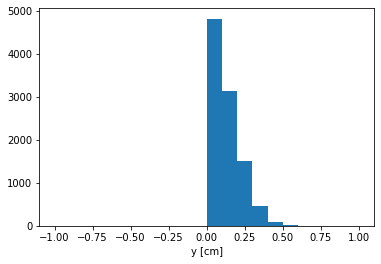

In [6]:
#plt.hist(A,2,range=[-1,1]);
#plt.hist(A,20);
#print(A)
A = np.array(A);
B=np.array(B);
D=np.array(D);
E=np.array(E);
#D=np.sqrt(A**2+B**2)
#A.reshape(-1,1)
#plt.hist(E,20,range=[-1.0,1.0]);
plt.hist(D,20,range=[-1.0,1.0]);
#plt.hist(E,20,range=[-1.0,1.0]);
plt.xlabel("y [cm]")
#plt.ylabel(" [cm]")

#plt.hist(A)
#plt.hist(B)
#plt.scatter(A,B)

In [7]:
def gauss1(x, A, mu, sigma):
    y=A*np.exp(-(x-mu)**2/(2*sigma**2))
    return y

[ 2.31975947e+03  9.90865242e-04 -2.59937568e-01]


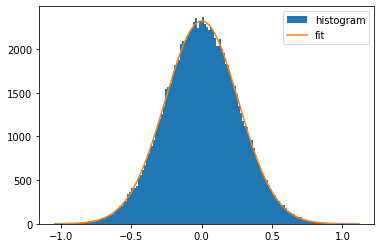

In [8]:
bin_heights, bin_borders, _ = plt.hist(dc, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gauss1, bin_centers, bin_heights, p0=[1., 0., 0.15])
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gauss1(x_interval_for_fit, *popt), label='fit')
plt.legend()
print(popt)

In [9]:
# initialize list of lists
data = [['tom', 10], ['nick', 15], ['juli', 16]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age'])
 
# print dataframe.
df

,Name,Age
0,tom,10
1,nick,15
2,juli,16


In [10]:
df["Del"]=(df["Age"]-11)**2
df

,Name,Age,Del
0,tom,10,1
1,nick,15,16
2,juli,16,25


In [11]:
df["Del"]=(df["Age"]-15)**2
df

,Name,Age,Del
0,tom,10,25
1,nick,15,0
2,juli,16,1


In [12]:
df_x= df[df['Del'] >= 1]
df_x

,Name,Age,Del
0,tom,10,25
2,juli,16,1


In [13]:
b=df["Del"].idxmin()
print(b)

1


In [14]:
c=df.iloc[b]["Name"]
c

'nick'

In [15]:
del df["Del"]
df

,Name,Age
0,tom,10
1,nick,15
2,juli,16


In [16]:
data1 = [[0.001, 1, 0, 10], [0.001, 0, 1, 10], [0.006, 4,2,10]]
data1

[[0.001, 1, 0, 10], [0.001, 0, 1, 10], [0.006, 4, 2, 10]]

In [17]:
df2 = pd.DataFrame(data1, columns = ['B', 'x','y','z'])
df2

,B,x,y,z
0,0.001,1,0,10
1,0.001,0,1,10
2,0.006,4,2,10


In [18]:
dfnew = df2.rename(columns={'x': 'y','y': 'x'})
dfnew

,B,y,x,z
0,0.001,1,0,10
1,0.001,0,1,10
2,0.006,4,2,10


In [19]:
df_1stq=df2.append(dfnew)
df_1stq

,B,x,y,z
0,0.001,1,0,10
1,0.001,0,1,10
2,0.006,4,2,10
0,0.001,0,1,10
1,0.001,1,0,10
2,0.006,2,4,10


In [20]:
df_2ndq=df_1stq.copy()
df_2ndq.x=df_2ndq.x*-1
df_2ndq
#df_1stq

,B,x,y,z
0,0.001,-1,0,10
1,0.001,0,1,10
2,0.006,-4,2,10
0,0.001,0,1,10
1,0.001,-1,0,10
2,0.006,-2,4,10


In [21]:
df_3rdq=df_2ndq.copy()
df_3rdq.y=df_3rdq.y*-1
df_3rdq

,B,x,y,z
0,0.001,-1,0,10
1,0.001,0,-1,10
2,0.006,-4,-2,10
0,0.001,0,-1,10
1,0.001,-1,0,10
2,0.006,-2,-4,10


In [22]:
df_4thq=df_1stq.copy()
df_4thq.y=df_4thq.y*-1
df_4thq

,B,x,y,z
0,0.001,1,0,10
1,0.001,0,-1,10
2,0.006,4,-2,10
0,0.001,0,-1,10
1,0.001,1,0,10
2,0.006,2,-4,10


In [33]:
df_Final=pd.concat([df_1stq, df_2ndq, df_3rdq,df_4thq],ignore_index=True)
df_Final
df_Final=df_Final.drop_duplicates(ignore_index=True)
df_Final

,B,x,y,z
0,0.001,1,0,10
1,0.001,0,1,10
2,0.006,4,2,10
3,0.006,2,4,10
4,0.001,-1,0,10
5,0.006,-4,2,10
6,0.006,-2,4,10
7,0.001,0,-1,10
8,0.006,-4,-2,10
9,0.006,-2,-4,10


In [24]:
def ConstructAllData(df):
    #p=pd.read_csv(T,delim_whitespace=True)
    #df_1       = pd.DataFrame(p)
    #df = df_1.dropna()
    df_OtherHalf = df.rename(columns={'x': 'y','y': 'x'})
    df_1stq=df.append(df_OtherHalf)
    df_2ndq=df_1stq.copy()
    df_2ndq.x=df_2ndq.x*-1
    df_3rdq=df_2ndq.copy()
    df_3rdq.y=df_3rdq.y*-1
    df_4thq=df_1stq.copy()
    df_4thq.y=df_4thq.y*-1
    df_Final=pd.concat([df_1stq, df_2ndq, df_3rdq,df_4thq],ignore_index=True)
    df_Final
    return df_Final

In [25]:
data2 = [[0.001, 1, 0, 10], [0.001, 0, 1, 10], [0.006, 4,5,10]]
data2

[[0.001, 1, 0, 10], [0.001, 0, 1, 10], [0.006, 4, 5, 10]]

In [26]:
df3 = pd.DataFrame(data2, columns = ['B', 'x','y','z'])
df3

,B,x,y,z
0,0.001,1,0,10
1,0.001,0,1,10
2,0.006,4,5,10


In [27]:
df4=ConstructAllData(df3)
df5=ConstructAllData(df3)
df6=df4.copy()
df6["BT"]=df4["B"]+df5["B"]
df6

,B,x,y,z,BT
0,0.001,1,0,10,0.002
1,0.001,0,1,10,0.002
2,0.006,4,5,10,0.012
3,0.001,0,1,10,0.002
4,0.001,1,0,10,0.002
5,0.006,5,4,10,0.012
6,0.001,-1,0,10,0.002
7,0.001,0,1,10,0.002
8,0.006,-4,5,10,0.012
9,0.001,0,1,10,0.002


In [28]:
df4.duplicated().any()

True

In [29]:
df4.duplicated(subset=None, keep='first')

0     False
1     False
2     False
3      True
4      True
5     False
6     False
7      True
8     False
9      True
10     True
11    False
12     True
13    False
14    False
15     True
16     True
17    False
18     True
19     True
20    False
21     True
22     True
23    False
dtype: bool